***
# 3.1 First Order Syntax for Bird 26
### JX, 08/07/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = 'Bird26'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels
0,0,2.53,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-7.5537066, 8.209083]",21,21|0|1.0|1.0|0.0|nan|nan|nan|nan,154,4
1,0,2.53,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6834063, 9.239816]",11,11|0|0.0|1.0|0.0|1.0|0.0|0.0|nan,14,2
2,0,2.53,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.5902307, -12.39612]",0,0|0|0.0|0.0|1.0|0.0|nan|nan|nan,1,0
3,0,2.53,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7.0395265, 3.0541244]",26,26|1|1.0|0.0|nan|nan|nan|nan|nan,206,19
4,1,7.66,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1442027, -3.2366111]",12,12|1|0.0|1.0|0.0|nan|nan|nan|nan,37,35


## Find Consistent Transitions

In [3]:
from butcherbird import sequential

In [4]:
import numpy as np

In [5]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

In [6]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [7]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
#p_container

In [8]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [9]:
p = np.swapaxes(p_container, 0, 1)

In [10]:
p

array([[0.04568528, 0.03768844, 0.03233831, ..., 0.03317536, 0.02820513,
        0.03804348],
       [0.01015228, 0.00753769, 0.00746269, ..., 0.01421801, 0.00769231,
        0.00815217],
       [0.07614213, 0.07537688, 0.0721393 , ..., 0.07819905, 0.07435897,
        0.03804348],
       ...,
       [0.        , 0.08108108, 0.08333333, ..., 0.05454545, 0.01923077,
        0.03846154],
       [0.02702703, 0.02702703, 0.        , ..., 0.01818182, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03846154,
        0.        ]])

In [11]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [12]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
#higherconfints

In [13]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [14]:
trans_long

,songType,noteType,markov,p
0,True,0,0,0.000000
1,True,0,1,0.000000
2,True,0,2,0.000000
3,True,0,3,0.000000
4,True,0,4,0.005155
...,...,...,...,...
1364,True,36,32,0.085106
1365,True,36,33,0.000000
1366,True,36,34,0.000000
1367,True,36,35,0.000000


In [15]:
trans_long['higherconfint'] = higherconfints

In [16]:
trans_long

,songType,noteType,markov,p,higherconfint
0,True,0,0,0.000000,0.037407
1,True,0,1,0.000000,0.010728
2,True,0,2,0.000000,0.078476
3,True,0,3,0.000000,0.002712
4,True,0,4,0.005155,0.068441
...,...,...,...,...,...
1364,True,36,32,0.085106,0.042692
1365,True,36,33,0.000000,0.037299
1366,True,36,34,0.000000,0.047683
1367,True,36,35,0.000000,0.015466


In [17]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [18]:
filtered_trans_long

,songType,noteType,markov,p,higherconfint
5,True,0,5,0.018041,0.016302
19,True,0,19,0.953608,0.040577
52,True,1,15,0.819820,0.041552
68,True,1,31,0.045045,0.004868
69,True,1,32,0.063063,0.039670
...,...,...,...,...,...
1261,True,34,3,0.028825,0.002844
1264,True,34,6,0.889135,0.040534
1329,True,35,34,0.968085,0.043343
1347,True,36,15,0.893617,0.041739


In [19]:
ftl = filtered_trans_long

## Rhythm Dyadic Analysis

In [20]:
## load rhythm analyzer
import butcherbird.rhythm as rhythm

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:163: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [21]:
dyadic = rhythm.construct_rhythm_df(note_df, 'lasso_labels')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

In [22]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
0,0.052859,0.172000,4,2,0,0.052859,0.172000,0.224858,0.235075,0.307318,1
1,0.172000,0.187250,2,0,19,0.172000,0.187250,0.359250,0.478775,0.918556,2
2,0.225811,0.304189,35,34,6,0.225811,0.304189,0.530000,0.426059,0.742340,1
3,0.446981,0.165348,20,0,15,0.165348,0.446981,0.612329,0.729969,0.369921,2
4,0.304189,0.370000,34,6,20,0.304189,0.370000,0.674189,0.451192,0.822131,3
...,...,...,...,...,...,...,...,...,...,...,...
8007,0.180239,0.210000,0,19,2,0.180239,0.210000,0.390239,0.461869,0.858282,5
8008,0.203257,0.260423,9,27,23,0.203257,0.260423,0.463680,0.438356,0.780488,6
8009,0.210000,0.260000,19,2,25,0.210000,0.260000,0.470000,0.446809,0.807692,7
8010,0.430000,0.200000,25,17,11,0.200000,0.430000,0.630000,0.682540,0.465116,8


In [23]:
ftl

,songType,noteType,markov,p,higherconfint
5,True,0,5,0.018041,0.016302
19,True,0,19,0.953608,0.040577
52,True,1,15,0.819820,0.041552
68,True,1,31,0.045045,0.004868
69,True,1,32,0.063063,0.039670
...,...,...,...,...,...
1261,True,34,3,0.028825,0.002844
1264,True,34,6,0.889135,0.040534
1329,True,35,34,0.968085,0.043343
1347,True,36,15,0.893617,0.041739


In [24]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [25]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.01*len(dyadic):
        verified.append(index)

In [26]:
vr = ftl.filter(items = verified, axis = 0)

In [27]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [28]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [29]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [30]:
eligible_transitions

,songType,noteType,markov,p,higherconfint
74,True,2,0,0.345432,0.037465
95,True,2,21,0.513141,0.039457
356,True,9,23,0.442661,0.023186
366,True,9,33,0.373853,0.034836
564,True,15,9,0.615741,0.042006
588,True,15,33,0.275463,0.034686
792,True,21,15,0.287411,0.041741
803,True,21,26,0.605701,0.025802
916,True,24,28,0.296000,0.040618
920,True,24,32,0.640000,0.036333


In [31]:
import scipy.stats
import itertools

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations
        destinations = np.unique(bif_df['markov'])
        pairs = list(itertools.combinations(destinations, 2))
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        for pair in pairs: 
            t1_df = note_df[note_df['label2'] == pair[0]]
            t2_df = note_df[note_df['label2'] == pair[1]]
            bif_prob0 = bif_df[bif_df['markov'] == pair[0]]['p'].values[0]
            bif_prob1 = bif_df[bif_df['markov'] == pair[1]]['p'].values[0]
            
            ### e. compute ks
            try:
                ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
            except:
                ks = [None, None]
                print('ks not computed')
            ### e. feeds out pandas
            output.append(
                pd.DataFrame(
                    {
                        'pre_bif': [note],
                        'bif_des': [(pair[0], pair[1])],
                        'bif_prof': [
                            (
                                bif_prob0,
                                bif_prob1
                            )
                        ],
                        'rhy_cnts': [
                            (
                                len(t1_df),
                                len(t2_df)
                            )
                        ],
                        'ks_statistic': [ks[0]],
                        'ks_p': [ks[1]]
                    }
                )
            )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [32]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

Finished querying bifurcation with pre_bif  2
Finished querying bifurcation with pre_bif  9
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  21
Finished querying bifurcation with pre_bif  24
Finished querying bifurcation with pre_bif  32


In [33]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.883634,3.160450e-136
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.254635,2.631016e-05
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.991379,7.899610e-94
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",1.000000,1.179450e-101
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.590878,1.884640e-33
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.356100,8.782928e-10


In [34]:
entangle['ks_p'] < 0.001

0    True
0    True
0    True
0    True
0    True
0    True
Name: ks_p, dtype: bool

In [35]:
## bonferroni correct

In [36]:
import statsmodels.stats.multitest

In [37]:
entangle['bonferroni_p'] = statsmodels.stats.multitest.multipletests(entangle['ks_p'].values, alpha = 0.05, method = 'bonferroni')[1]

In [38]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p,bonferroni_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.883634,3.160450e-136,1.896270e-135
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.254635,2.631016e-05,1.578609e-04
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.991379,7.899610e-94,4.739766e-93
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",1.000000,1.179450e-101,7.076702e-101
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.590878,1.884640e-33,1.130784e-32
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.356100,8.782928e-10,5.269757e-09


In [39]:
entangle['bonferroni_p'] < 0.001

0    True
0    True
0    True
0    True
0    True
0    True
Name: bonferroni_p, dtype: bool

In [40]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle_shuffled = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

Finished querying bifurcation with pre_bif  2
Finished querying bifurcation with pre_bif  9
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  21
Finished querying bifurcation with pre_bif  24
Finished querying bifurcation with pre_bif  32


In [41]:
entangle_shuffled

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.047013,0.836849
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.078511,0.637279
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.092024,0.481060
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",0.112235,0.230285
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.063260,0.782754
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.117290,0.189390


# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [42]:
import scipy.stats as stats

In [43]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [44]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9545933457122737

## Find Baseline using bootstrap

In [45]:
from tqdm.autonotebook import tqdm

In [46]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

  0%|          | 0/100 [00:00<?, ?it/s]

In [47]:
mean_confidence_interval(SDoMSE, confidence=0.95)

(0.03086286900521127, 0.030328860587014235, 0.031396877423408305)

## Output Graphs for every analyzed transition

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [49]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p,bonferroni_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.883634,3.160450e-136,1.896270e-135
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.254635,2.631016e-05,1.578609e-04
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.991379,7.899610e-94,4.739766e-93
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",1.000000,1.179450e-101,7.076702e-101
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.590878,1.884640e-33,1.130784e-32
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.356100,8.782928e-10,5.269757e-09


In [50]:
note_types = entangle['pre_bif'].values
destinations = entangle['bif_des'].values

In [51]:
## shuffle dyadic
time_info = dyadic[['intervals1', 
                   'intervals2',
                   's_interval',
                   'l_interval',
                   'cycle_dur',
                   'ratio_roeske',
                   'ratio_custom',
                   'cycle_rank'
                  ]]

syntax_info = dyadic[['label1',
                      'label2',
                      'label3'
                  ]]

bootstrapped_time_info = time_info.sample(frac = 100, replace = True).reset_index(drop = True)
bootstrapped_syntax_info = syntax_info.sample(frac = 100, replace = True).reset_index(drop = True)
dyadic_shuffle = bootstrapped_time_info.join(bootstrapped_syntax_info)

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


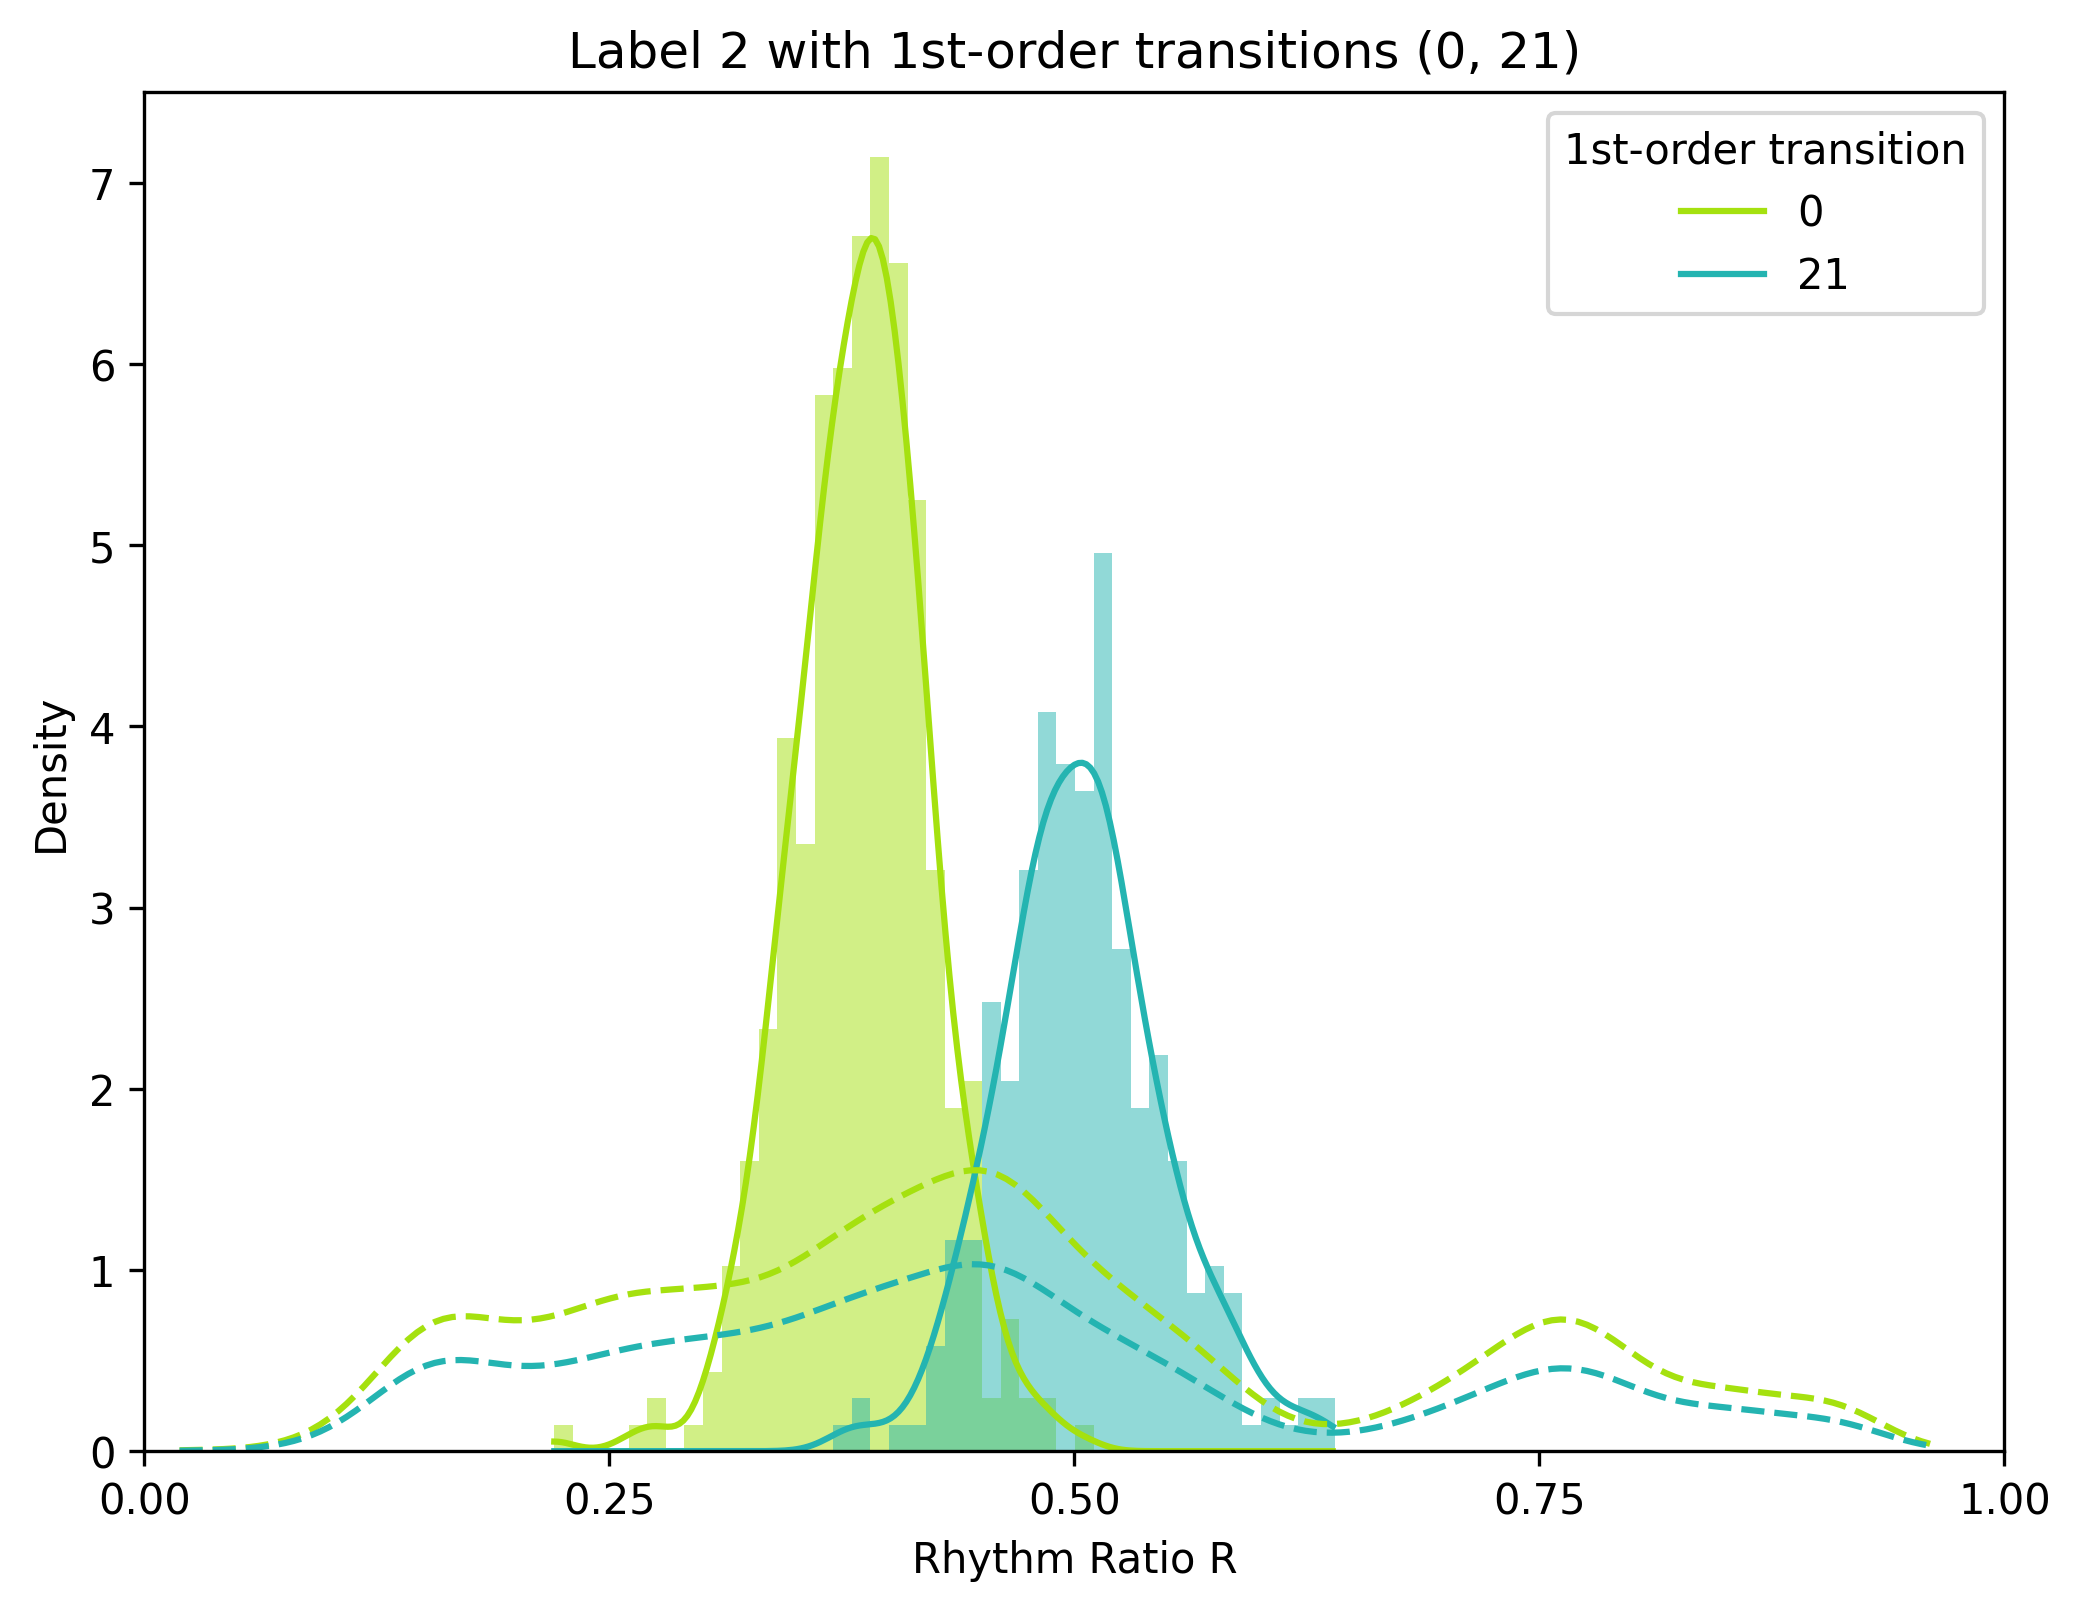

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


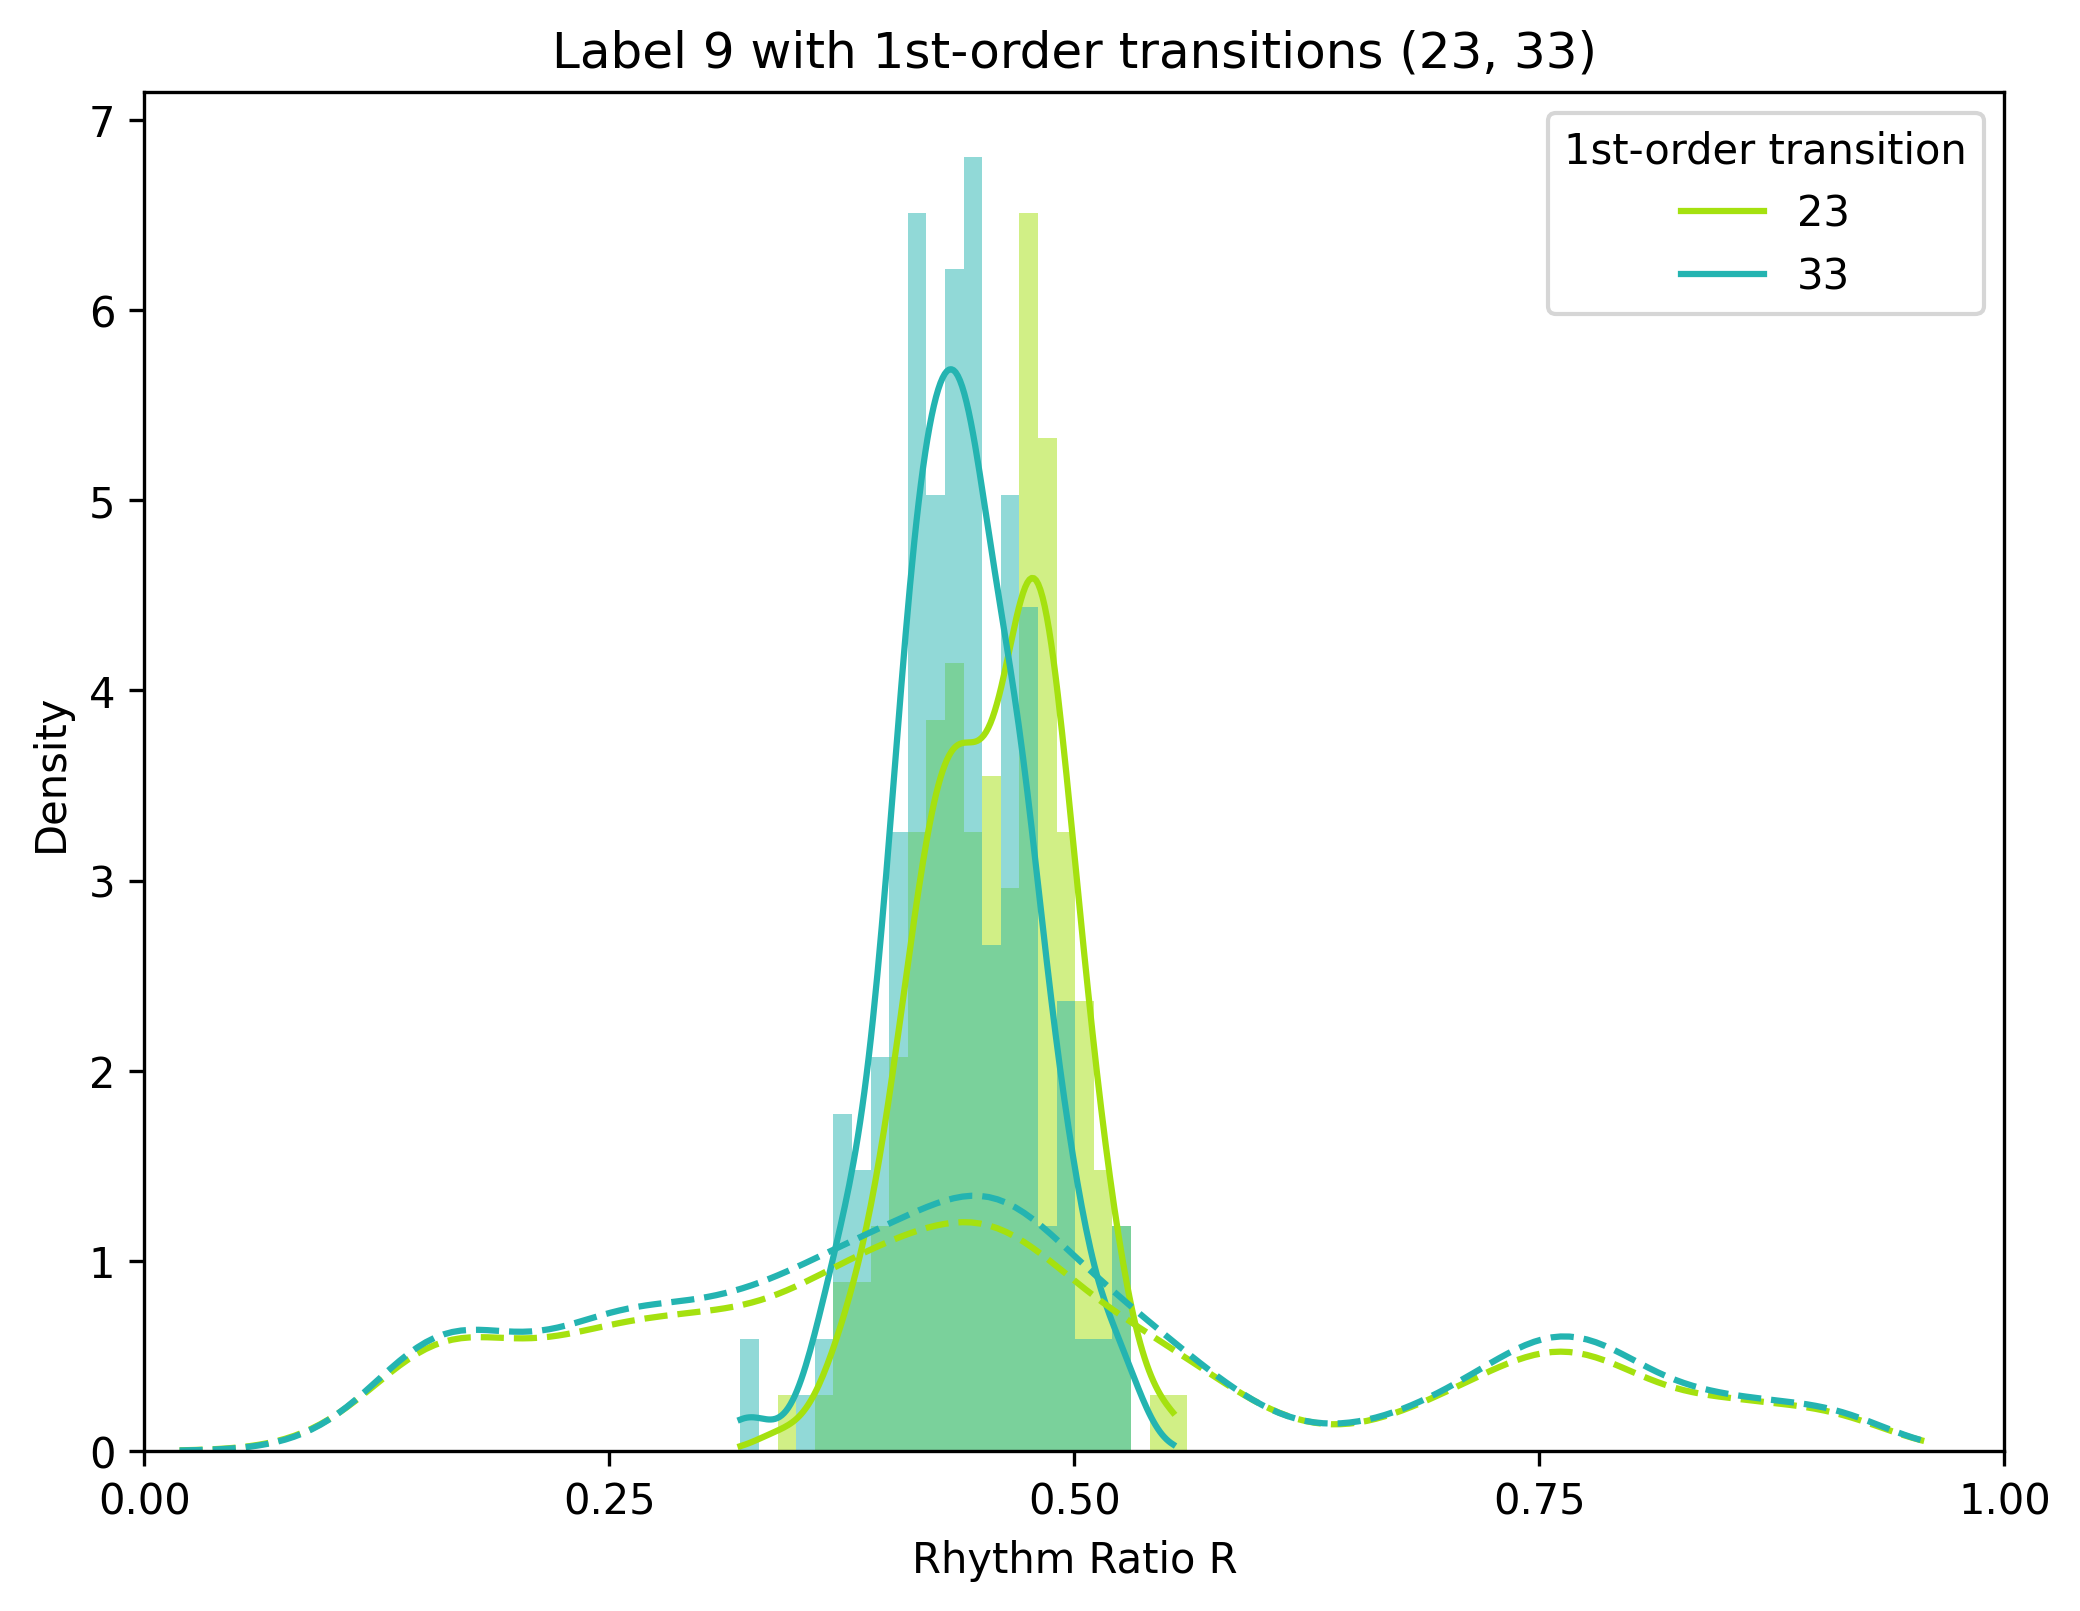

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


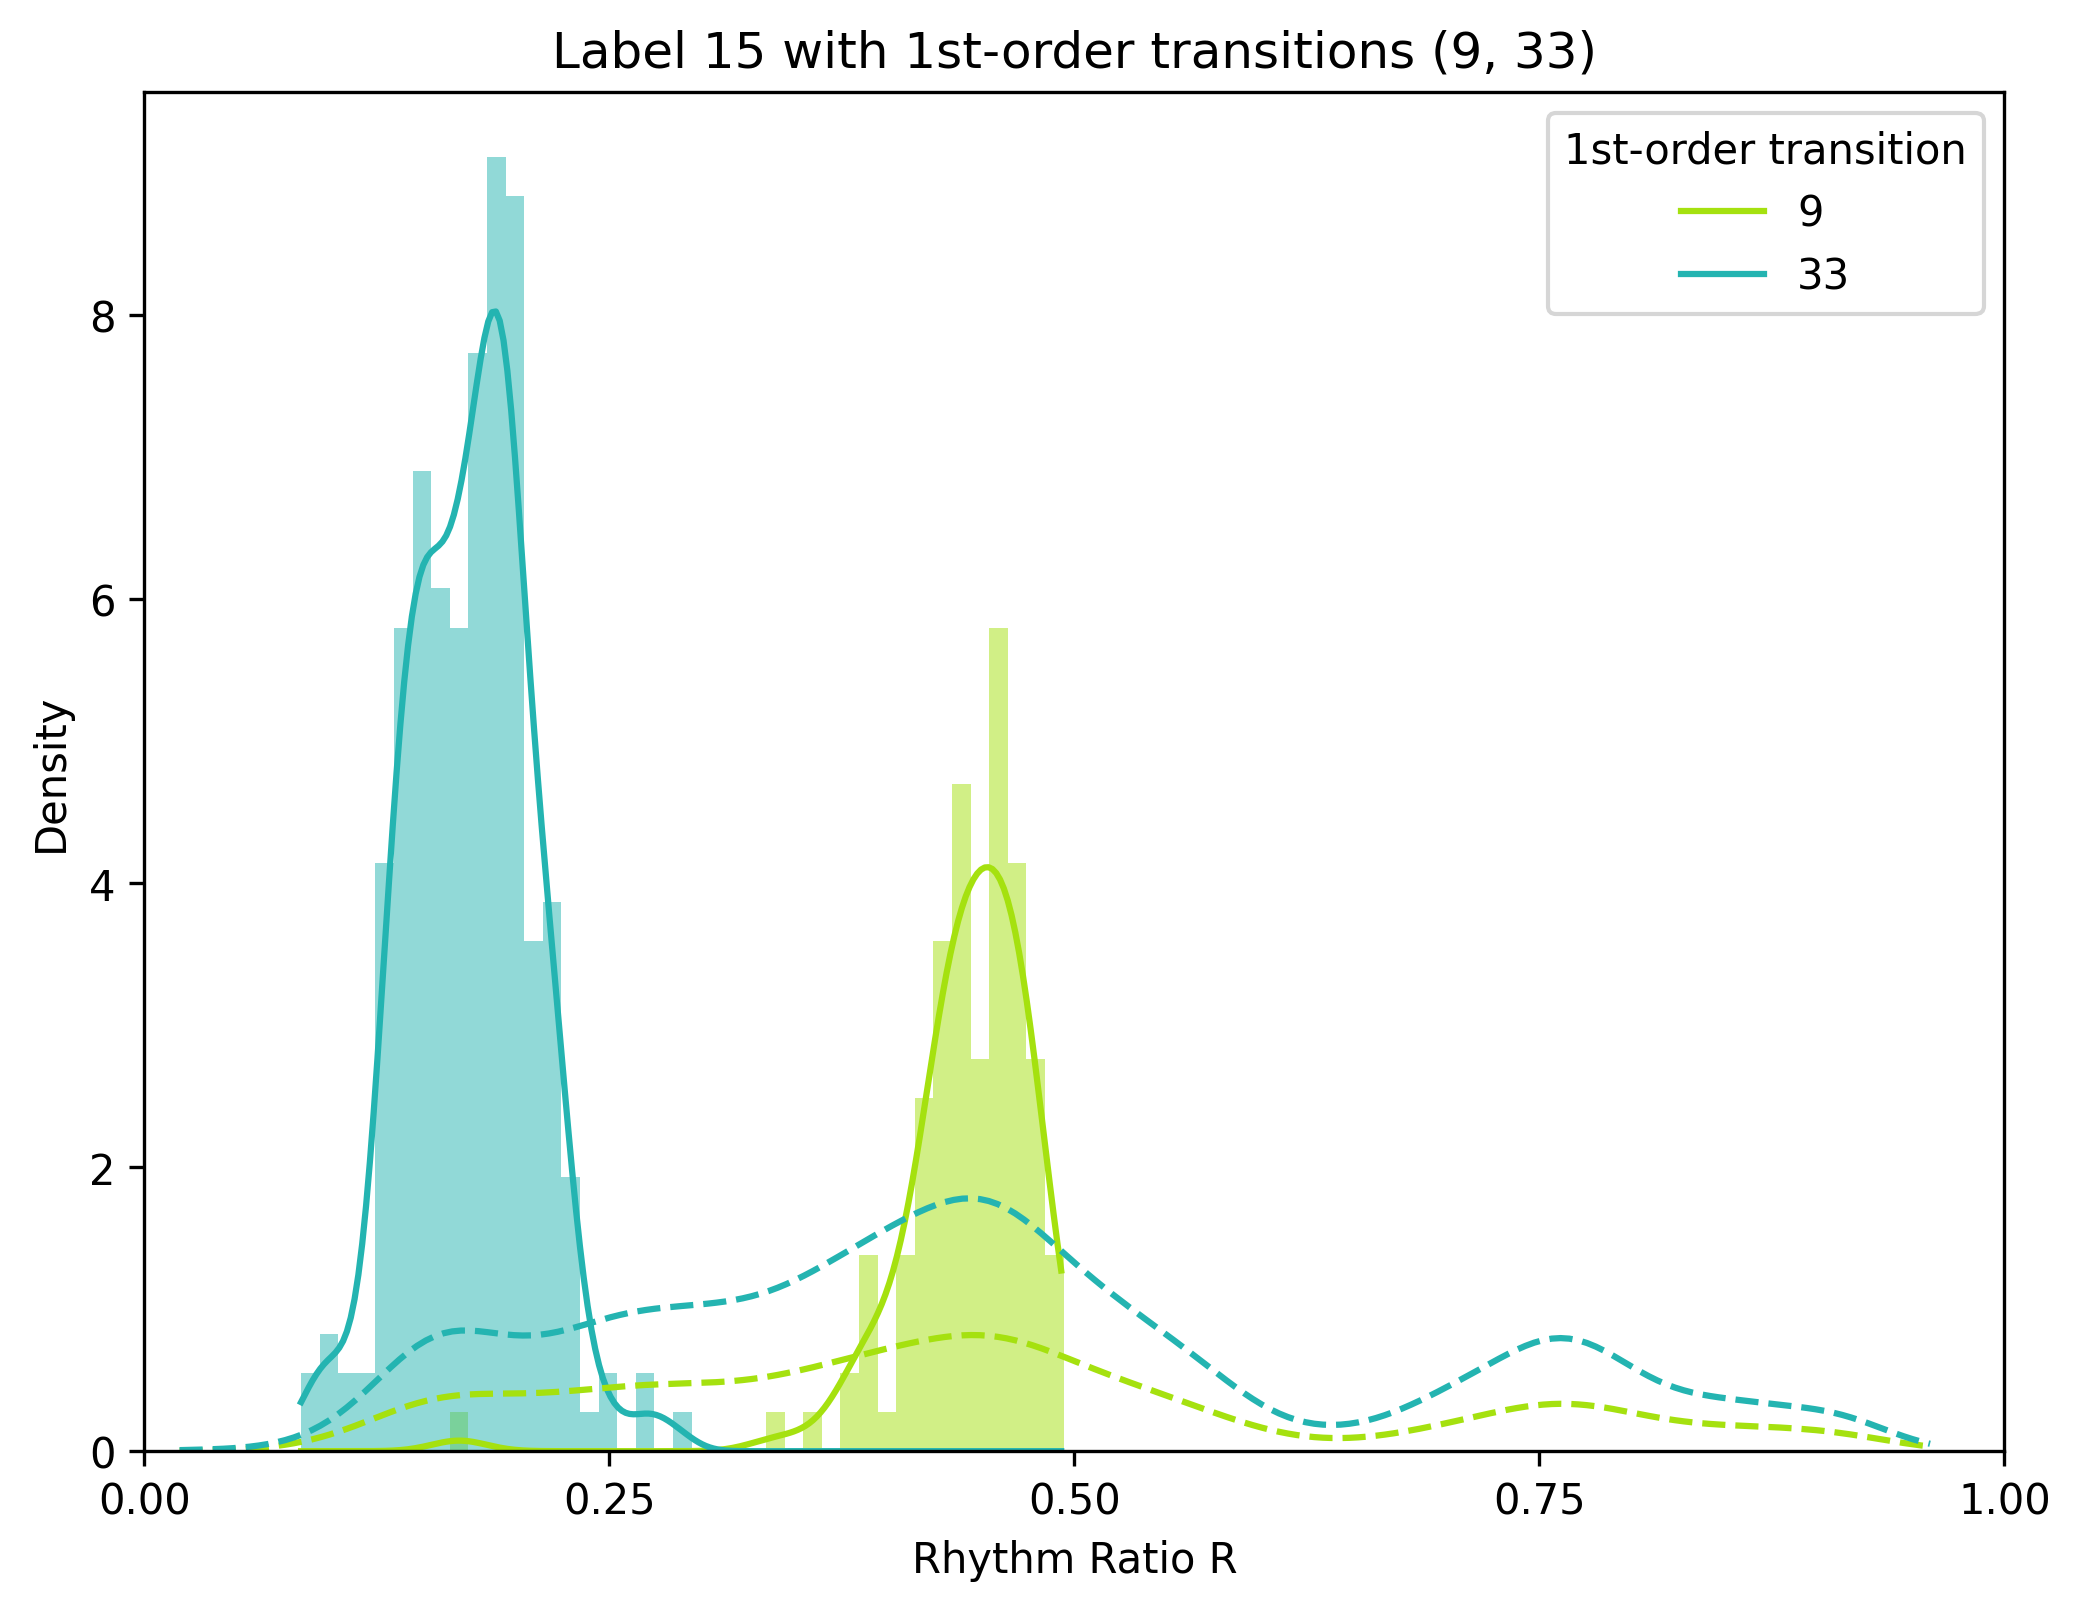

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


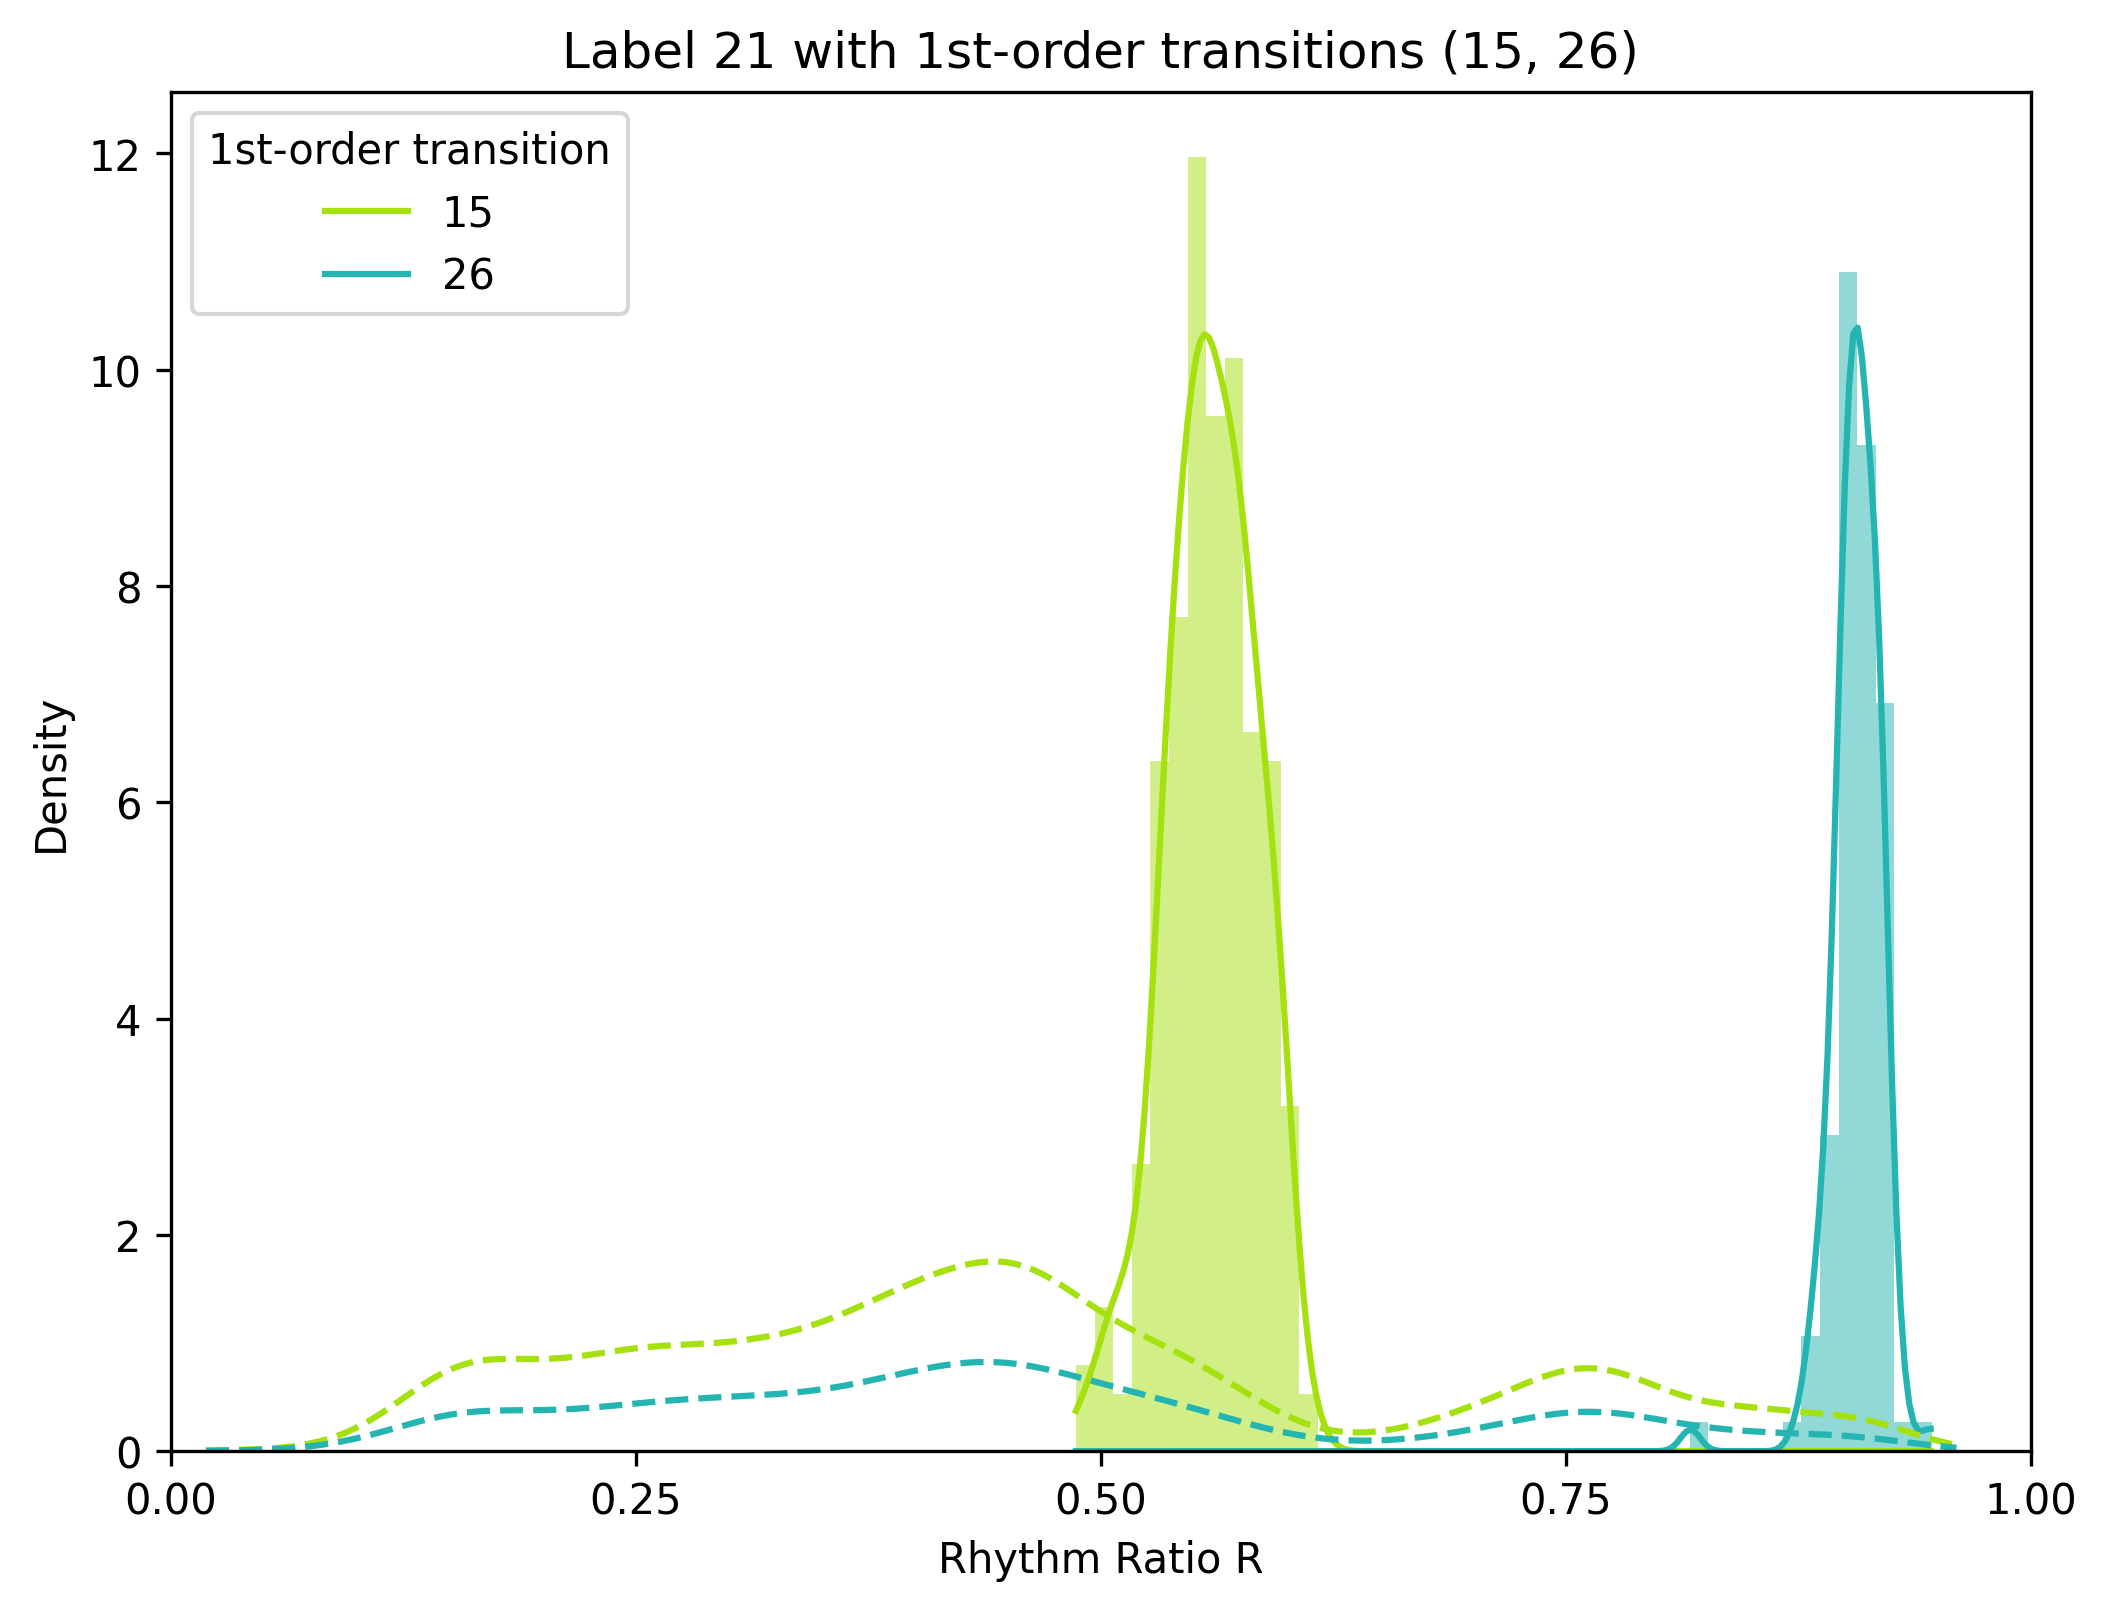

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


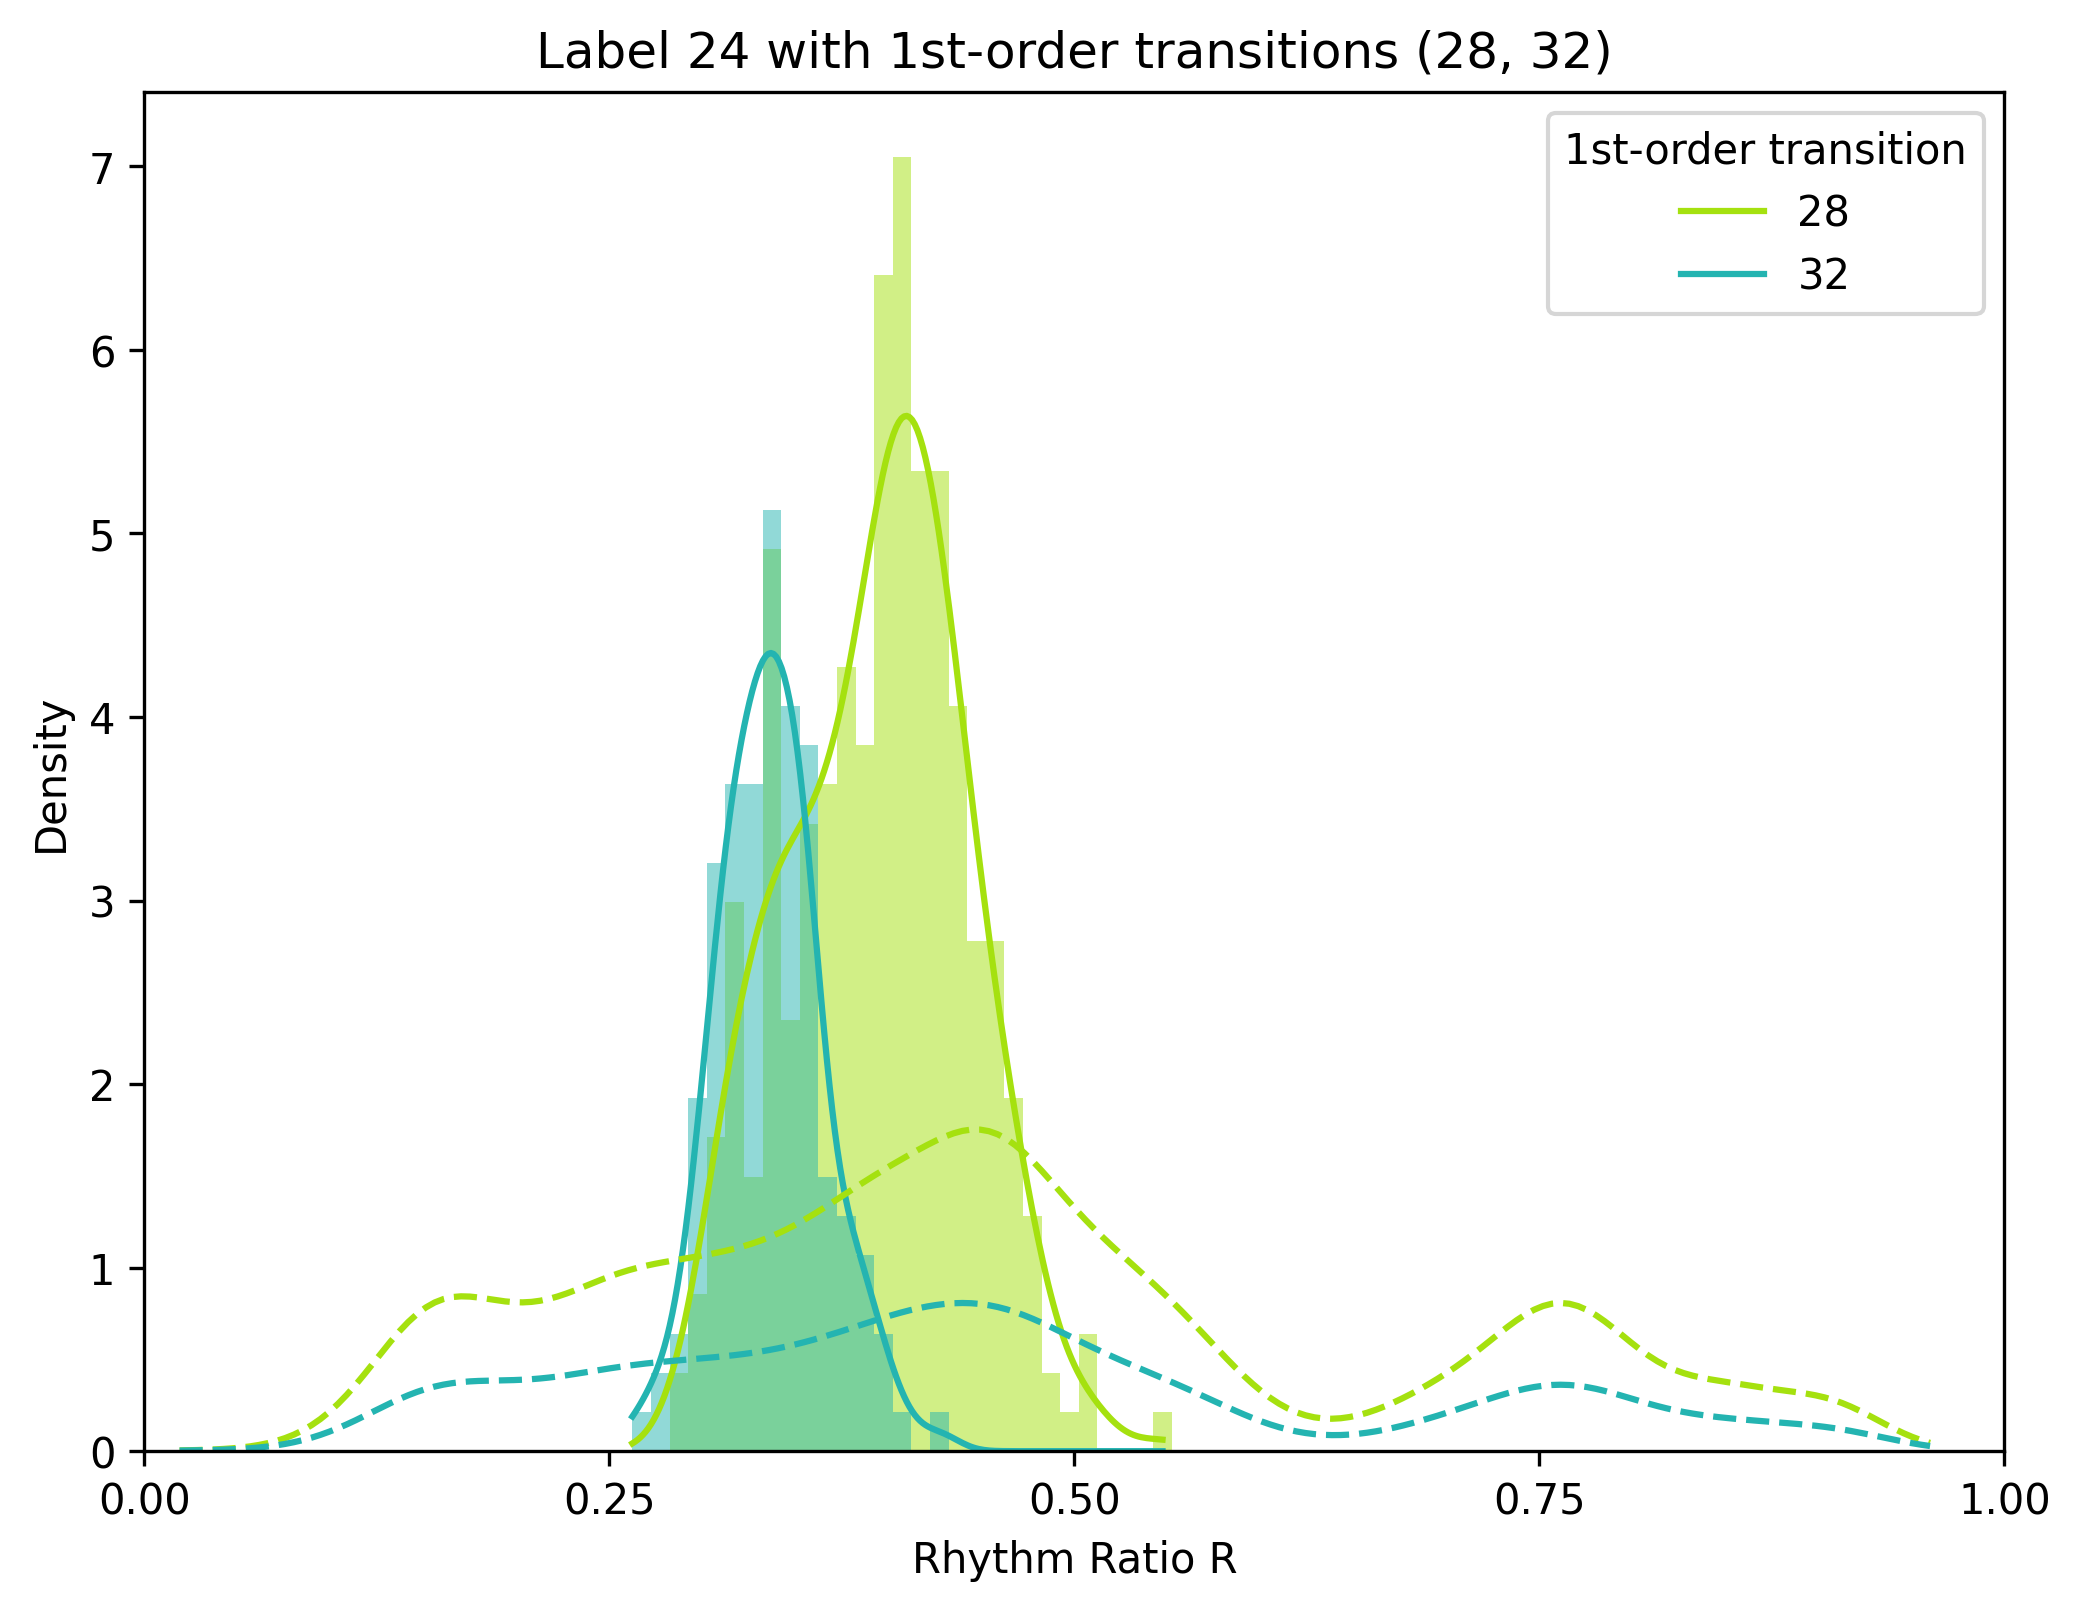

/tmp/ipykernel_20642/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_20642/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


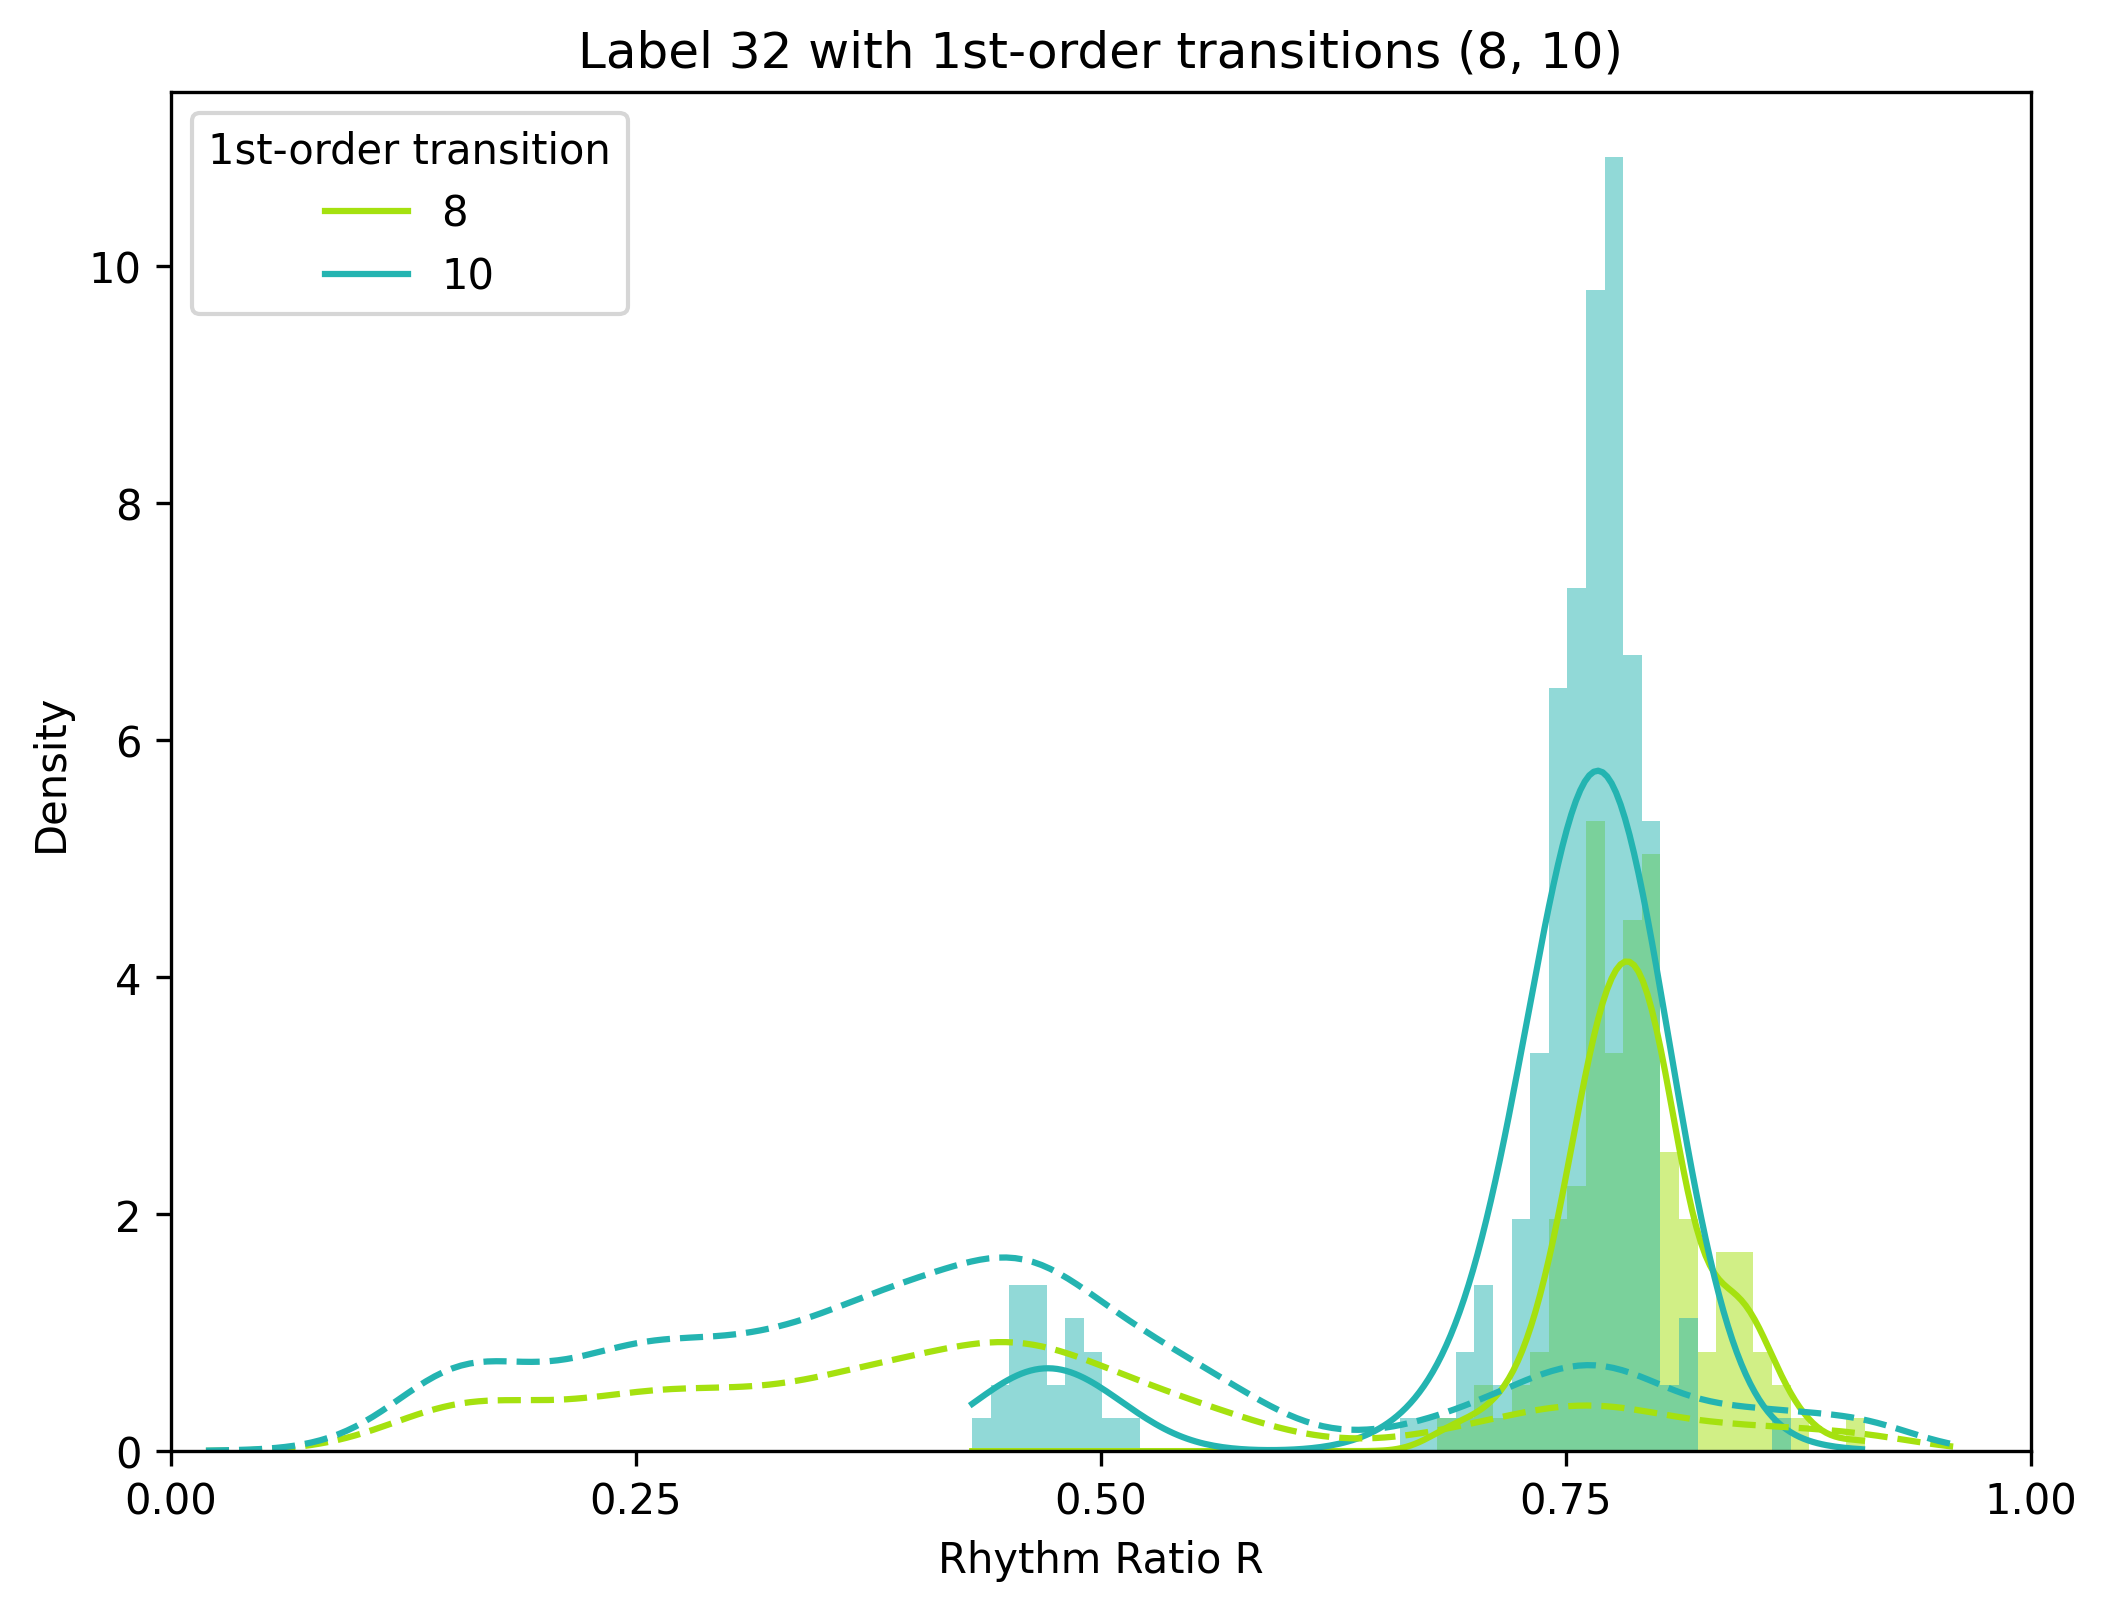

In [52]:
## for every note type and corresponding destinations
for note_type, destination in zip(note_types, destinations):
    ## filter zero-order and its shuffle
    pos1 = dyadic[dyadic['label1'] == note_type]
    pos1_shuffle = dyadic_shuffle[dyadic_shuffle['label1'] == note_type]
    ## filter first_order and its shuffle
    pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
    pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])
    
    ## graph
    figure(figsize=(8, 6), dpi=300)
       
    x = pos2 
    
    # Create an array with the colors you want to use
    colors = ["#24B4B1", "#A5E10F"]
    # Set your custom color palette
    custom = sns.set_palette(sns.color_palette(colors))
    
    plt.rcParams['patch.edgecolor'] = 'none'
    
    plt.legend(title='1st-order transition', labels = np.unique(pos2['label2']))
    
    sns.histplot(
        data = x,
        binwidth = 0.01,
        x = 'ratio_roeske',
        hue = 'label2',
        kde = True,
        palette = sns.color_palette(colors),
        stat = 'density'
    ).set(title = 'Label ' + str(note_type) + ' with 1st-order transitions ' + str(destination), xlabel = 'Rhythm Ratio R')
    
    x_shuffle = pos2_shuffle
    
    sns.histplot(
        data = x_shuffle,
        binwidth = 0.01,
        x = 'ratio_roeske',
        hue = 'label2',
        kde = True,
        palette = sns.color_palette(colors),
        alpha = 0,
        stat = 'density',
        line_kws = dict(linestyle = 'dashed')
    )
    
    
    ax = plt.gca()
    ax.set_xlim([0, 1])
    plt.xticks(np.arange(0, 1.25, 0.25))
    
    plt.legend(title='1st-order transition', labels = np.unique(pos2['label2']))
    
    #ax.set_ylim([0, 100])
    
    from butcherbird.utils.paths import FIGURE_DIR
    
    figname = str(indv) + '_' + str(note_type) + '_' + str(destination) + ".pdf"
    
    plt.savefig(FIGURE_DIR/'first_order'/str(indv)/figname)
    plt.show()
    